<a href="https://colab.research.google.com/github/AlbertoMartinezS/idal_ia3/blob/main/05_PCA_wines_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PCA en Wines dataset**

#### Manuel Sánchez-Montañés

In [1]:
COLAB = True

First we import the libraries we will need. In addition we will use the first code cell to activate the *inline* mode for the graphics generated by *matplotlib*. We also initialize the seed of the random generator.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## **Data Load**

Now we will use clustering in a wine database. The goal is to check if the clustering discovers the different real wine types.

The database describes the parameters of different wine instances. There are 3 types of wine and 13 wine features with the levels of the most important indicators:
- Alcohol
- Malic acid
- Ash
- Ash alcalinity
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280_OD315
- Proline

Now we load this database:


In [3]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR',
                                        dest_path="./datasets/wine_dataset.csv")

data = pd.read_csv('datasets/wine_dataset.csv', delimiter=';', header=0)

print('\033[1m' + 'Wine Database\n', '\033[0m')
print('Number of real classes (wine types): %d' % np.unique(data['Type']).shape[0])
print('Unique class labels:', np.unique(data['Type']))
print('\nFirst 5 instances:\n')
data.sample(10)

Wine Database
 
Number of real classes (wine types): 3
Unique class labels: ['A' 'B' 'C']

First 5 instances:



,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
120,B,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625
145,C,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
83,B,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515
135,C,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695
80,B,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
17,A,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130
26,A,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
169,C,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630
23,A,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015
56,A,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970


## **Data Description**

In [4]:
data.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
Alcohol,178.0,11.03,14.83,13.000618,0.811827
Malic_Acid,178.0,0.74,5.80,2.336348,1.117146
Ash,178.0,1.36,3.23,2.366517,0.274344
Ash_Alcalinity,178.0,10.60,30.00,19.494944,3.339564
Magnesium,178.0,70.00,162.00,99.741573,14.282484
Total_Phenols,178.0,0.98,3.88,2.295112,0.625851
Flavanoids,178.0,0.34,5.08,2.029270,0.998859
Nonflavanoid_Phenols,178.0,0.13,0.66,0.361854,0.124453
Proanthocyanins,178.0,0.41,3.58,1.590899,0.572359
Color_Intensity,178.0,1.28,13.00,5.058090,2.318286


## **Data Exploration**

In [5]:
X = data.drop("Type", axis=1)
y = data["Type"]

classes_names = data['Type'].unique()
print(classes_names)
attribute_names = X.columns
print(attribute_names)

['A' 'B' 'C']
Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcalinity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280_OD315', 'Proline'],
      dtype='object')


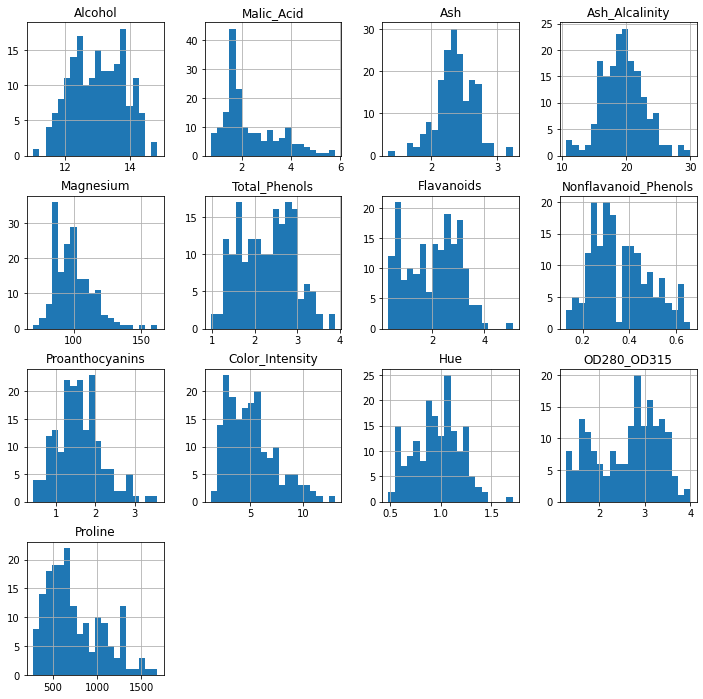

In [6]:
data.hist(bins=20, figsize=(12,12), layout=(-1,4));

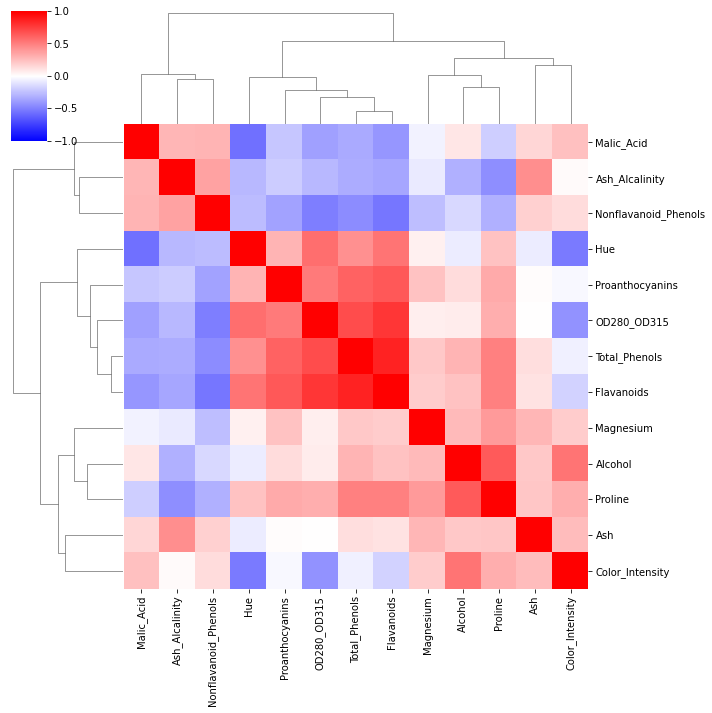

In [7]:
sns.clustermap(X.corr(), cmap="bwr", vmin=-1, vmax=1);

# **PCA**

After loading the database we need to do some basic preprocessing: standarization and PCA:

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(X)
#X_std = X
X_std.var(axis=0).round(3)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
pca = PCA()
X_pca = pca.fit_transform(X_std)
# equivalente a:
#pca.fit(X_std)
#X_pca = pca.transform(X_std)

print(X.shape)
print(X_std.shape)
print(X_pca.shape)

(178, 13)
(178, 13)
(178, 13)


In [10]:
(4.732+2.511)/(13*1.)

0.5571538461538462

In [11]:
X_pca[:,0].var()

4.7058502529904205

In [12]:
print()
print('-- Estadísticas de los datos proyectados en las componentes principales --')
print()
#pd.DataFrame(X_pca).describe()

for i in range(X_pca.shape[1]):
    print("* Datos en componente principal", i+1, ":")
    print("  - Media    :", X_pca[:,i].mean().round(3))
    print("  - Varianza :", X_pca[:,i].var(ddof=1).round(3))
    print("  - Autovalor:", pca.explained_variance_[i].round(3))
    print("  - Varianza explicada:", (100*pca.explained_variance_ratio_[i]).round(3), "%")
    print()

# IMPORTANT: note that we have used all the patterns in the dataset
# to fit the parameters of StandardScaler and PCA
# This is ONLY ok if we are NOT going to develop a predictive model
# for "y" using this data (in that case, we would use both training and test
# data for fitting the parameters, and using test data for fitting is forbidden!)
#
# If we were going to develop a model for predicting the value
# of a target variable "y" (classification / regression problem),
# first we would need to split the dataset in training and test sets:
#
# testsize = 0.2
# Xaux_train, Xaux_test, y_train, y_test = train_test_split(Xaux, y, test_size=testsize)
#
# and both the normalization and PCA should be fitted using only the training set:
#
# std_scaler = StandardScaler()
# std_scaler.fit(Xaux_train)
# X_std_train = std_scaler.transform(Xaux_train)
# pca = PCA(n_components=2)
# pca.fit(X_std_train)
# X_train = pca.transform(X_std_train)
#
# X_std_test = std_scaler.transform(Xaux_test)
# X_test = pca.transform(X_std_test)


-- Estadísticas de los datos proyectados en las componentes principales --

* Datos en componente principal 1 :
  - Media    : 0.0
  - Varianza : 4.732
  - Autovalor: 4.732
  - Varianza explicada: 36.199 %

* Datos en componente principal 2 :
  - Media    : -0.0
  - Varianza : 2.511
  - Autovalor: 2.511
  - Varianza explicada: 19.207 %

* Datos en componente principal 3 :
  - Media    : 0.0
  - Varianza : 1.454
  - Autovalor: 1.454
  - Varianza explicada: 11.124 %

* Datos en componente principal 4 :
  - Media    : 0.0
  - Varianza : 0.924
  - Autovalor: 0.924
  - Varianza explicada: 7.069 %

* Datos en componente principal 5 :
  - Media    : -0.0
  - Varianza : 0.858
  - Autovalor: 0.858
  - Varianza explicada: 6.563 %

* Datos en componente principal 6 :
  - Media    : -0.0
  - Varianza : 0.645
  - Autovalor: 0.645
  - Varianza explicada: 4.936 %

* Datos en componente principal 7 :
  - Media    : -0.0
  - Varianza : 0.554
  - Autovalor: 0.554
  - Varianza explicada: 4.239 %

* Dato

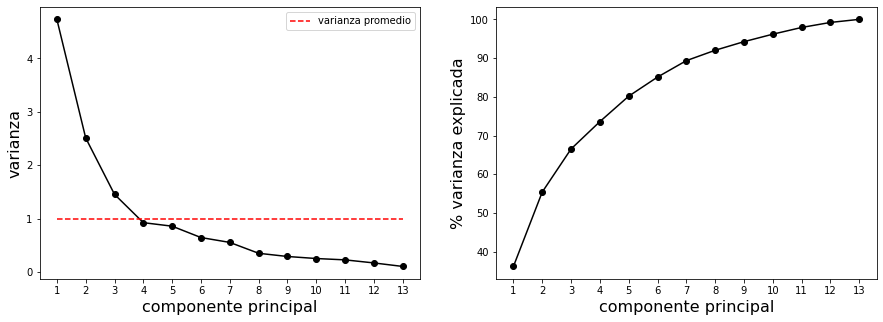

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_, '-ok')
plt.plot([1,pca.n_components_], [1,1], '--r', label='varianza promedio')
plt.legend()
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('varianza', fontsize=16)
plt.xticks(range(1,pca.n_components_+1))

plt.subplot(1,2,2)
plt.plot(range(1,pca.n_components_+1),
         100*pca.explained_variance_ratio_.cumsum(), '-ok')
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('% varianza explicada', fontsize=16)
plt.xticks(range(1,pca.n_components_+1));

In [14]:
pcs_names = ['componente principal '+str(i+1) for i in range(pca.n_components_)]
pcs_names

['componente principal 1',
 'componente principal 2',
 'componente principal 3',
 'componente principal 4',
 'componente principal 5',
 'componente principal 6',
 'componente principal 7',
 'componente principal 8',
 'componente principal 9',
 'componente principal 10',
 'componente principal 11',
 'componente principal 12',
 'componente principal 13']

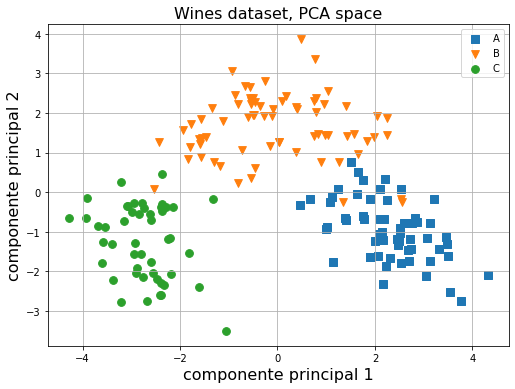

In [16]:
pc_x = 0
pc_y = 1

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

fig = plt.figure(figsize=(7,5))
for label,color,marker in zip(classes_names,colors,markers):
    inds = np.where(y == label)[0]
    plt.scatter(X_pca[inds, pc_x],
                X_pca[inds, pc_y],
                s = 60,
                c = color,
                marker = marker,
                alpha = 1.0,
                cmap='RdYlGn',
                label = label)

plt.legend(); plt.grid(); plt.tight_layout()
plt.title('Wines dataset, PCA space', fontsize=16)
plt.xlabel(pcs_names[pc_x], fontsize=16)
plt.ylabel(pcs_names[pc_y], fontsize=16);

In [17]:
def PCA_plot(X_std, y, attribute_names, classes_names,
             colors, markers, pca, pcs_names,
             ax, pc_x=0, pc_y=1):
    X_pca = pca.transform(X_std)
    for label,color,marker in zip(classes_names,colors,markers):
        inds = np.where(y == label)[0]
        plt.scatter(X_pca[inds, pc_x],
                    X_pca[inds, pc_y],
                    s = 60,
                    c = color,
                    marker = marker,
                    alpha = 1.0,
                    cmap='RdYlGn',
                    label = label)
    factor = 6*np.sqrt(np.max(np.cov(X_std,rowvar=False)))
    aux = np.eye(len(attribute_names))
    attributes_PCA = pca.transform(aux)
    for a,name in zip(attributes_PCA,attribute_names):
        ax.arrow(0, 0, a[pc_x]*factor, a[pc_y]*factor,
                 head_width=1/4*0.05*factor*1.5,
                 head_length=1/4*0.1*factor*1.5, fc='k', ec='k')
        plt.text(a[pc_x]*factor, a[pc_y]*factor, name, color='r')
        
    plt.legend(); plt.grid(); plt.tight_layout()
    plt.xlabel(pcs_names[pc_x], fontsize=16)
    plt.ylabel(pcs_names[pc_y], fontsize=16)

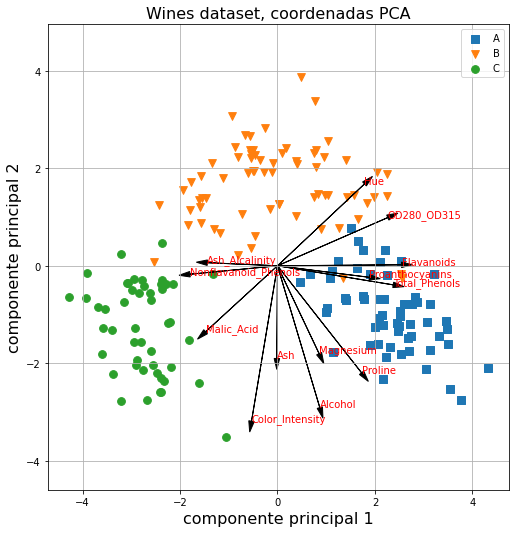

In [18]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
PCA_plot(X_std, y, attribute_names, classes_names,
         colors, markers, pca, pcs_names, ax, pc_x=0, pc_y=1)
plt.title('Wines dataset, coordenadas PCA', fontsize=16)
plt.axis('equal');

In [19]:
X_pca[0]

array([ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
       -0.22388013,  0.59642655,  0.06513909,  0.64144271,  1.02095585,
       -0.4515634 ,  0.54081041, -0.06623863])

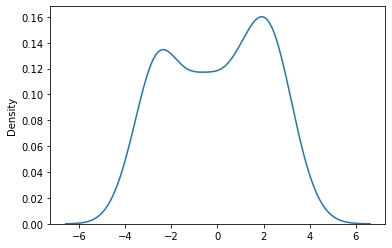

In [20]:
import seaborn as sns

sns.distplot(X_pca[:,0], hist=False);

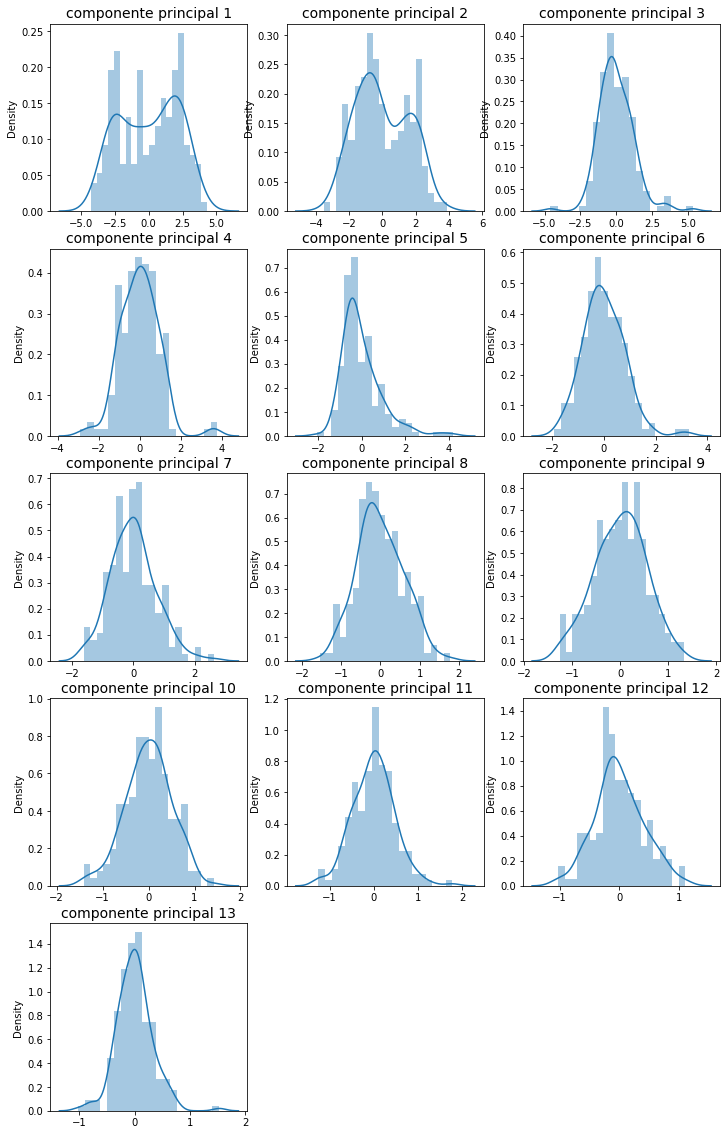

In [21]:
nrows = int(np.ceil(pca.n_components_/3))
plt.figure(figsize=(12,4*nrows))
for i in range(pca.n_components_):
    plt.subplot(nrows,3,i+1)
    sns.distplot(X_pca[:,i], bins=20)
    plt.title(pcs_names[i], fontsize=14)

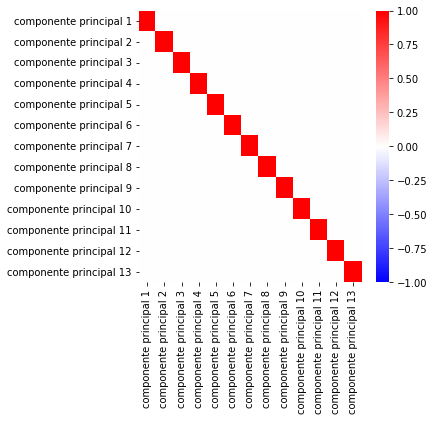

In [22]:
df_pca = pd.DataFrame(X_pca, columns=pcs_names)
plt.figure(figsize=(5,5))
sns.heatmap(df_pca.corr(), cmap="bwr", vmin=-1, vmax=1);